# Example for retrieving data from GMAO or GEOS5

author : Sylvie Dagoret-Campagne
creation : May 3rd 2016

### Info to get the datafile file


- web page for the help:

http://geos5.org/wiki/index.php?title=Recipe:_Retrieve_%28global%29_data_from_FTP_server


- ftp command:

wget ftp://G5NR:@ftp.nccs.nasa.gov/Ganymed/7km/c1440_NR/DATA/0.5000_deg/inst/inst01hr_3d_T_Cv/Y2006/M09/D18/c1440_NR.inst01hr_3d_T_Cv.20060918_0900z.nc4



In [1]:
import sys
import numpy as np
import netCDF4 as nc4
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline

In [3]:
 
rootgrp = nc4.Dataset('c1440_NR.inst01hr_3d_T_Cv.20060918_0900z.nc4', 'r')
print "rootgrp.variables['T'].shape", rootgrp.variables['T'].shape
 

rootgrp.variables['T'].shape (1, 72, 361, 720)


In [4]:
# read global air temperature for all levels
print 'Reading T...',; sys.stdout.flush()
T = rootgrp.variables['T'][0,:,:,:]
print 'done.'; sys.stdout.flush()
print 'T.shape:', T.shape
 

Reading T... done.
T.shape: (72, 361, 720)


In [5]:
# min/max
print 'min(T): %.4f' % np.min(T)
print 'max(T): %.4f' % np.max(T)

min(T): 180.3667
max(T): 315.6512


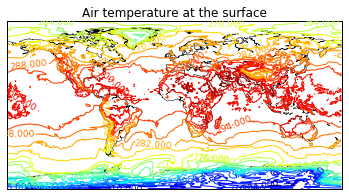

In [6]:
# set up cylindrical map
m = Basemap(projection='cyl',llcrnrlat=-90, urcrnrlat=90,llcrnrlon=-180, urcrnrlon=180,resolution='c')
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary()
 
# plot contour
level = 71 # surface
X = np.arange(-180.0, 180.0, .5)
Y = np.arange(-90.0, 90.1, .5) # 90 is the last element
cp = plt.contour(X, Y, T[level,:,:], 20, zorder=2)
plt.clabel(cp, inline=1, fontsize=9)
plt.title('Air temperature at the surface')
plt.show()
